In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
model = KNeighborsClassifier(n_neighbors = 1)

In [4]:
model.fit(X,y)
y_model = model.predict(X) #1.00 accuracy

In [5]:
print(accuracy_score(y, y_model)) #accuracy_score(orignal_labels, predicted_labels)

1.0


In [6]:
#The above method isn't good
#Using train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

In [7]:
holdout_model = model.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, holdout_model))

0.9066666666666666


In [8]:
#Using cross val score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [9]:
#Selecting the best model
#Underfitting --> High Bias, Doesn't describe the data wel;
#Overfitting -->  High Variance, Fit's the data well but doesn't perform well on new data (unseen)
#                 The model can have so much flexibility that the model ends up accounting for random errors as well as the underlying data distributions

In [10]:
#For high-bias models, the performance of the model on the validation set is similiar to the performance on the validation set, meaning their is less difference
#For high-variance models, the performance difference between training and validation data is very large, much worse


In [11]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [12]:
def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10-1./(X.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return X, y
X, y = make_data(40)

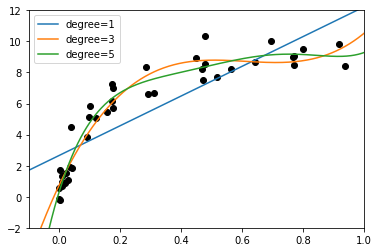

In [13]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

c:\users\seema gupta\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

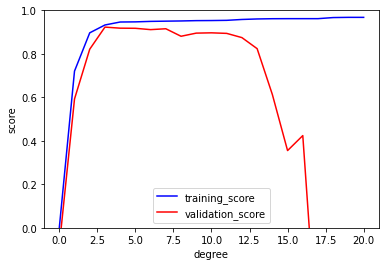

In [14]:
#Used for finding which degree of polynomial equation can best fit the data as well as have a good validation accuracy
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training_score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation_score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

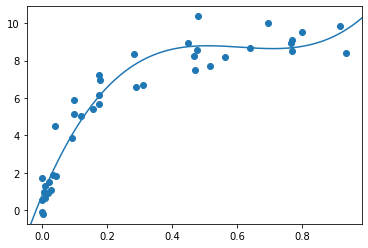

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

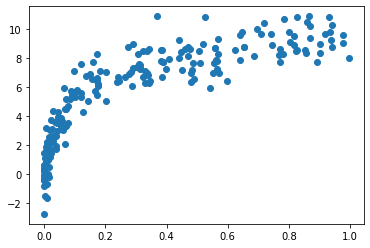

In [16]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

c:\users\seema gupta\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

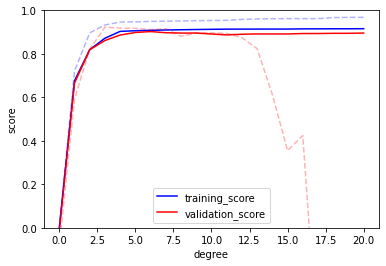

In [17]:
#The solid lines show the new results, while the fainter dashed line shows the results of the previous smaller dataset.
#It is clear from the validation curve that the larger dataset can support 
#a much more complicated model but the smaller dataset requires less degree
#From the validation curve, we can read-off that the optimal trade-off
#between bias and variance is found a third-order polynomial
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training_score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation_score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [18]:
#A learning curve plots the score over varying numbers of training samples, 
#while a validation curve plots the score over a varying hyper parameter. 
#The learning curve is a tool for finding out if an estimator would benefit from more data, 
#or if the model is too simple (biased).
#The general behavior we would expect from a learning curve is this:
#    A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
#    A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
#    A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.
#Once if a particular model converges, adding more training data will not help! 
#The only way to increase model performance in this case is to use
#another(often more complex) model.

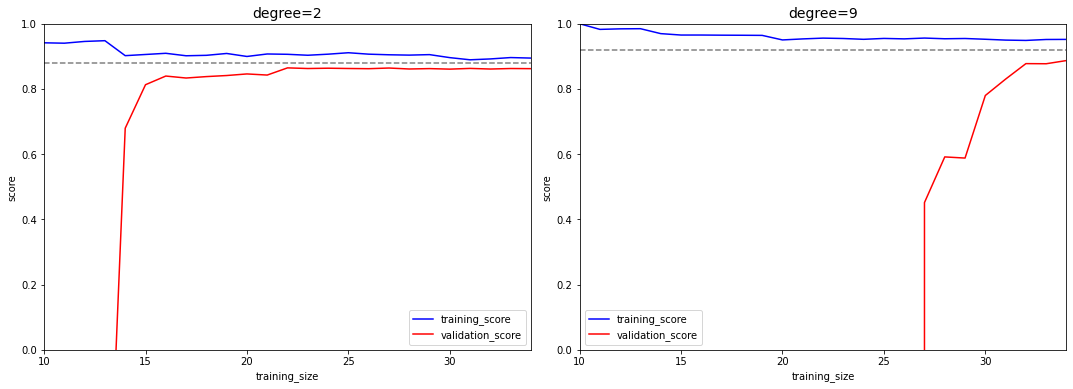

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X,y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training_score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation_score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training_size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [20]:
#Fine tuning the model : GridSearchCV
#GridSearchCV can be used to find the particular model that maximizes
#the validation score
param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [21]:
grid.fit(X, y);

In [22]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [23]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

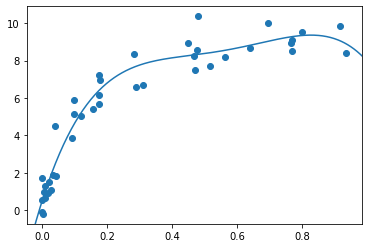

In [24]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);